# Design of Retaining Wall
http://structengblog.com/retaining-wall-analysis-ipython-sympy-possible-bim-integration/

In [1]:
from sympy import *

init_printing()

ka, q, gs, z = symbols('k_a q gamma_s z') # soil properties and depth
gfq, gfg = symbols('gamma_fq gamma_fg') # partial load factors
pa, va, ma = symbols('p_a v_a m_a') # force effects

pressure = Eq(pa,ka*(gs*z*gfg + q*gfq))
pressure

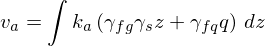

In [2]:
shear = Eq(va, Integral(pressure.rhs, z))
shear

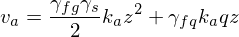

In [3]:
shear = shear.doit()
shear

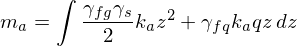

In [4]:
moment = Eq(ma, Integral(shear.rhs,z))
moment

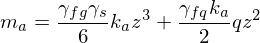

In [5]:
moment = moment.doit()
moment

In [6]:
wallData = ({ka:0.3, gs:19, gfg:1.35, gfq:1.5, q:5, z:3.4})
designSliding = shear.subs(wallData).rhs
print('The ULS sliding force at the base of the wall = {:.2f} kN'.format(designSliding))



The ULS sliding force at the base of the wall = 52.13 kN


In [7]:
designMoment = moment.subs(wallData).rhs
print('The ULS overturning moment at the base of the wall = {:.2f} kNm'.format(designMoment))

The ULS overturning moment at the base of the wall = 63.41 kNm


In [8]:
# geometric properties of the wall
hs, ts, lb, tb, toe = symbols('h_s t_s l_b t_b toe')
gc = symbols('gamma_c') # unit weight of the wall
W, Mst, Ru = symbols('W M_st R_u') # resistances
mu = symbols('mu') # coeff of friction to base
stemWeight = gc*hs*ts
baseWeight = gc*lb*tb
soilLength = lb-(toe+ts)
soilWeight = hs*soilLength*gs
totalWeight = Eq(W,stemWeight+baseWeight+soilWeight)
totalWeight 

In [9]:
slidingResistance = Eq(Ru, totalWeight.rhs*mu)
slidingResistance

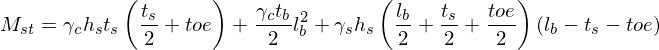

In [10]:
# lever arms to the elements
lab = lb/2
las = toe+ts/2
lau = lb - soilLength/2
stabilityMoment = Eq(Mst,stemWeight*las+baseWeight*lab + soilWeight*lau)
stabilityMoment

In [11]:
wallGeo = ({gc:24, hs:3.15, ts:0.25, tb:0.25, toe:0.75, gs:19, mu:0.5})
slidingStability = slidingResistance.subs(wallGeo)
slidingStability

In [12]:
baseLength1 = solve(slidingStability.rhs - designSliding, lb)[0]
print('The minimum base length to prevent sliding = {:.2f} m'.format(baseLength1))

The minimum base length to prevent sliding = 2.21 m


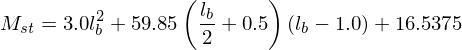

In [13]:
overturningStability = stabilityMoment.subs(wallGeo)
overturningStability

In [14]:
baseLength2 = solve(overturningStability.rhs - designMoment, lb)[1]
print('The minimum base length to resist overturning = {:.2f} m'.format(baseLength2))

The minimum base length to resist overturning = 1.53 m


In [15]:
# by inspection of the above solutions adopt the following base length
baseLength = 2.3

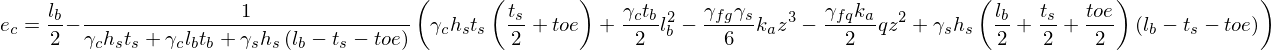

In [16]:
# Calculate the eccentricity of load from the centroid of the base
ec = symbols('e_c')
netMoment = stabilityMoment.rhs-moment.rhs
xBar = netMoment / totalWeight.rhs
eccentricity = Eq(ec,lb/2 - xBar)
eccentricity

In [17]:
# amend the partial load factors to 1 for the force effectrs
wallData = ({ka:0.3, gs:19, gfg:1.0, gfq:1.0, q:5, z:3.4})
wallGeo = ({gc:24, hs:3.15, ts:0.25, tb:0.25, toe:0.75, gs:19, mu:0.5, lb: baseLength})
wallData.update(wallGeo)
actEc = eccentricity.subs(wallData)
actEc.evalf(3)

In [18]:
# The kern of the foundation
kern = lb.subs(wallData)/6
kern.evalf(3)

In [19]:
if actEc.rhs > kern:
    print('Tension occurs at the heel')
    qmax = 2*totalWeight.rhs.subs(wallData)/(3*xBar.subs(wallData))
    print('The maximum pressure = {:.2f} kPa'.format(qmax))
else:
    print('No tension occurs under the base')
    qmax = actEc.rhs*totalWeight.rhs.subs(wallData)*6/(lb.subs(wallData)**2)\
    +totalWeight.rhs.subs(wallData)/lb.subs(wallData)
    print('The maximum pressure = {:.2f} kPa'.format(qmax))

No tension occurs under the base
The maximum pressure = 62.00 kPa


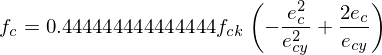

In [20]:
fck, fy = symbols('f_ck f_y')
ec, ecy, ecu = symbols('e_c, e_cy, e_cu')
fc = symbols('f_c')
conc_str = Eq(fc, 4.0/9*fck*(2*(ec/ecy)-(ec/ecy)**2))
conc_str

In [21]:
conc_data = ({fck:25, ecy:0.002, ec:0.0025})
conc_stress = conc_str.rhs.subs(conc_data)
conc_stress